In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel('/content/drive/MyDrive/와이빅타/DA_주니어플젝/데이터_2022.05.18.xlsx')
data.head()

,Title,url,thumbnail
0,'과학방역' 내세운 중대본…전문가위원회·빅데이터 플랫폼 구성,https://www.yna.co.kr/view/AKR2022051803830053...,https://search.pstatic.net/common/?src=https%3...
1,"넥슨, 라프텔과 '가명정보 결합'…데이터 사이언스 강화",http://www.newsis.com/view/?id=NISX20220518_00...,https://search.pstatic.net/common/?src=https%3...
2,"인공위성 '세종 1호' 쏘는 한글과컴퓨터, 이미지 데이터 노린다",http://www.bloter.net/newsView/blt202205180027,https://search.pstatic.net/common/?src=https%3...
3,"넥슨, 라프텔과 가명정보 결합…""데이터 사이언스 강화""",https://www.news1.kr/articles/?4683961,https://search.pstatic.net/common/?src=https%3...
4,"KT SAT ""스페이스데이터 서비스 진출…글로벌 브랜드 키운다""",https://www.hankyung.com/it/article/202205184568i,https://search.pstatic.net/common/?src=https%3...


In [ ]:
!pip install JPype1-1.2.0-cp38-cp38-win_amd64.whl
!pip install konlpy==0.5.2
!pip install tweepy==3.10.0

In [28]:
from konlpy.tag import Okt, Kkma, Komoran
okt = Okt()
kkma = Kkma()
komoran = Komoran()
articles = data['Title'].to_list() #DataFrame에서 df['Article']의 Series에서 .to_list 함수를 써서 list형으로 바꾼다.

#1. 단순 명사 추출

In [58]:
#1 okt.nouns()로 명사 추출(단순)
contents_1 = []
for article in articles:
  contents_1.append(okt.nouns(article))

text_1 = [' '.join(contents_1[i]) for i in range(len(contents_1))]
print(text_1)

['과학 방역 세운 중 대본 전문가 위원회 빅데이터 플랫폼 구성', '넥슨 라프텔 가명 정보 결합 데이터 사이언스 강화', '인공위성 세종 호 한글과컴퓨터 이미지 데이터', '넥슨 라프텔 가명 정보 결합 데이터 사이언스 강화', '스페이스 데이터 서비스 진출 글로벌 브랜드', '농협 은행 마이 데이터 친구 추천 이벤트 진행', '하동군 데이터 기업 매칭 공모 선정', '행안부 기관 포함 개 기관 데이터 기반 행정 점검', '교통 사망 사고 빅데이터 도민 생명', '랜섬 웨어 피해 기업 곳 중 곳 대가 지불 데이터 복구 실패', '안산시 데이터 기업 매칭 지원 사업 추진', '교통 사망 사고 빅데이터 도민 생명', '란 질병 청장 감염병 컨트롤 타워 역할 재정 립 것 전문가 위원회 빅데이터 플랫폼 구성', '랜섬 웨어 피해 기업 곳 중 곳 대가 지불 데이터 복구 실패', '란 신임 질병 청장 데이터 활용 과학 방역', '인천 관광 공사 데이터 기업 매칭 사업 국비', '보령시 데이터 기업 매칭 지원 사업 연속 선정', '정부 코로나 빅데이터 플랫폼 구축 교육 시설 공기 정화 지원 종합', '한국 축산 데이터 축산 분야 최초 영국 선정 유럽 진출 본격', '디지털 플랫폼 정부 목적 데이터 호수 늪 돋보기', '란 빅데이터 기반 과학 방역 감염병 컨트롤 타워 정립 것', '과학 방역 나선 중 대본 전문가 위원회 빅데이터 플랫폼 구성', '한컴 세종 호 발사 위성 기반 데이터 서비스 사업 본격 시동', '마이 데이터 영국 플랫폼 마이 데이터 사업자', '중 대본 전문 가위 빅데이터 플랫폼 구성 확 진자 명', '유성구 데이터 기업 매칭 지원 사업 추진', '빅데이터 오전 주식시장 심리 단계 보통', '인젠트 가명 익명 처리 서비스 마이 데이터 쉴드 무료 체험', '자율 주행 로봇 거리 청소 헬싱키 기반 데이터 홍수 예측 뉴욕', '차이나 중국 채권 거래 데이터 해외 기관 투자가 공개 중단', '샴푸 브랜드 평판 빅데이터 분석 결과', '과기원 통증 구단 티 큐 빅데이

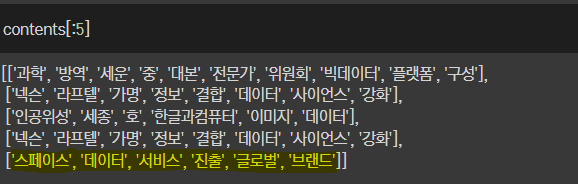

단점 : KT, SAT 와 같은 영어 단어들은 생략됨

# 2. [영어 & 명사] 추출

In [29]:
sample = articles[4] #KT SAT "스페이스데이터 서비스 진출…글로벌 브랜드 키운다"

print(okt.nouns(sample), '\n', kkma.nouns(sample), '\n', komoran.nouns(sample))

['스페이스', '데이터', '서비스', '진출', '글로벌', '브랜드'] 
 ['스페이스', '스페이스데이터', '데이터', '서비스', '진출', '벌', '브랜드'] 
 ['스페이스', '데이터', '서비스', '진출', '글로벌', '브랜드']


In [32]:
print(okt.morphs(sample), '\n', okt.nouns(sample), '\n', okt.phrases(sample), '\n', okt.pos(sample))

['KT', 'SAT', '"', '스페이스', '데이터', '서비스', '진출', '…', '글로벌', '브랜드', '키운다', '"'] 
 ['스페이스', '데이터', '서비스', '진출', '글로벌', '브랜드'] 
 ['KT', 'KT SAT', '스페이스데이터', '스페이스데이터 서비스', '스페이스데이터 서비스 진출', '글로벌', '글로벌 브랜드', 'SAT', '스페이스', '데이터', '서비스', '진출', '브랜드'] 
 [('KT', 'Alpha'), ('SAT', 'Alpha'), ('"', 'Punctuation'), ('스페이스', 'Noun'), ('데이터', 'Noun'), ('서비스', 'Noun'), ('진출', 'Noun'), ('…', 'Punctuation'), ('글로벌', 'Noun'), ('브랜드', 'Noun'), ('키운다', 'Verb'), ('"', 'Punctuation')]


In [50]:
content = []
pos_sample = okt.pos(sample)
for i in pos_sample:
  if i[1] in ['Noun', 'Alpha'] :
      content.append(i[0])

content



['KT', 'SAT', '스페이스', '데이터', '서비스', '진출', '글로벌', '브랜드']

In [60]:
# 전체 list에 대해 영어 & 명사 추출
contents_2 = []
for article in articles:
    content = []
    pos_article = okt.pos(article)
    for pos  in pos_article:
        if pos[1] in ['Noun', 'Alpha'] :   #Verb, Number 도 포함할까?
            content.append(pos[0])
    contents_2.append(content)
 

text_2 = [' '.join(contents_2[i]) for i in range(len(contents_2))]
print(text_2)

['과학 방역 세운 중 대본 전문가 위원회 빅데이터 플랫폼 구성', '넥슨 라프텔 가명 정보 결합 데이터 사이언스 강화', '인공위성 세종 호 한글과컴퓨터 이미지 데이터', '넥슨 라프텔 가명 정보 결합 데이터 사이언스 강화', 'KT SAT 스페이스 데이터 서비스 진출 글로벌 브랜드', '농협 은행 마이 데이터 친구 추천 이벤트 진행', '하동군 데이터 기업 매칭 공모 선정', '행안부 기관 포함 개 기관 데이터 기반 행정 점검', '교통 사망 사고 빅데이터 도민 생명', '랜섬 웨어 피해 기업 곳 중 곳 대가 지불 데이터 복구 실패', '안산시 데이터 기업 매칭 지원 사업 추진', '교통 사망 사고 빅데이터 도민 생명', '란 질병 청장 감염병 컨트롤 타워 역할 재정 립 것 전문가 위원회 빅데이터 플랫폼 구성', '랜섬 웨어 피해 기업 곳 중 곳 대가 지불 데이터 복구 실패', '란 신임 질병 청장 데이터 활용 과학 방역', '인천 관광 공사 데이터 기업 매칭 사업 국비', '보령시 데이터 기업 매칭 지원 사업 연속 선정', '정부 코로나 빅데이터 플랫폼 구축 교육 시설 공기 정화 지원 종합', '한국 축산 데이터 축산 분야 최초 영국 GEP 선정 유럽 진출 본격', '디지털 플랫폼 정부 목적 데이터 호수 늪 IT 돋보기', '란 빅데이터 기반 과학 방역 감염병 컨트롤 타워 정립 것', '과학 방역 나선 중 대본 전문가 위원회 빅데이터 플랫폼 구성', '한컴 세종 호 발사 위성 기반 데이터 서비스 사업 본격 시동', '마이 데이터 영국 플랫폼 마이 데이터 사업자', '중 대본 전문 가위 빅데이터 플랫폼 구성 확 진자 명', '유성구 데이터 기업 매칭 지원 사업 추진', '빅데이터 MSI 오전 주식시장 심리 단계 보통', '인젠트 가명 익명 처리 서비스 마이 데이터 쉴드 무료 체험', '자율 주행 로봇 거리 청소 헬싱키 IoT 기반 데이터 홍수 예측 뉴욕', '차이나 중국 채권 거래 데이터 해외 기관 투자가 공개 중단', '샴푸 브랜드 평판 빅데이터 분석 결

In [88]:
df1 = pd.DataFrame(text_1, columns=['contents_1'])
df2 = pd.DataFrame(text_2, columns=['contents_2'])
comparison = pd.concat([data['Title'], df1, df2], axis=1)
comparison

,Title,contents_1,contents_2
0,'과학방역' 내세운 중대본…전문가위원회·빅데이터 플랫폼 구성,과학 방역 세운 중 대본 전문가 위원회 빅데이터 플랫폼 구성,과학 방역 세운 중 대본 전문가 위원회 빅데이터 플랫폼 구성
1,"넥슨, 라프텔과 '가명정보 결합'…데이터 사이언스 강화",넥슨 라프텔 가명 정보 결합 데이터 사이언스 강화,넥슨 라프텔 가명 정보 결합 데이터 사이언스 강화
2,"인공위성 '세종 1호' 쏘는 한글과컴퓨터, 이미지 데이터 노린다",인공위성 세종 호 한글과컴퓨터 이미지 데이터,인공위성 세종 호 한글과컴퓨터 이미지 데이터
3,"넥슨, 라프텔과 가명정보 결합…""데이터 사이언스 강화""",넥슨 라프텔 가명 정보 결합 데이터 사이언스 강화,넥슨 라프텔 가명 정보 결합 데이터 사이언스 강화
4,"KT SAT ""스페이스데이터 서비스 진출…글로벌 브랜드 키운다""",스페이스 데이터 서비스 진출 글로벌 브랜드,KT SAT 스페이스 데이터 서비스 진출 글로벌 브랜드
...,...,...,...
2616,﻿[2022지방선거] ﻿1400만 경기도민 표심 잡아라…경기도지사 후보 김동연 vs...,지방선거 경기 도민 표심 경기도 지사 후보 김동연 김은혜,지방선거 경기 도민 표심 경기도 지사 후보 김동연 vs 김은혜
2617,"[사설] 가팔라질 기준금리 인상, 부채위기 확산 막아야",사설 팔 질 기준금리 인상 부채 위기 확산,사설 팔 질 기준금리 인상 부채 위기 확산
2618,﻿[2022지방선거] 세종시장 후보 이춘희 “행정수도 완성” vs 최민호 “윤석열 ...,지방선거 세종시 후보 이춘희 행정 수도 완성 최민호 윤석열 정부 새 시작,지방선거 세종시 후보 이춘희 행정 수도 완성 vs 최민호 윤석열 정부 새 시작
2619,"뉴욕증시 비트코인 흔들 제롬파월 연설 ""자이언트 빅스텝"" 소매판매 0.9%",뉴욕증시 비트코인 제롬 파월 연설 자이언트 빅스 텝 소매 판매,뉴욕증시 비트코인 제롬 파월 연설 자이언트 빅스 텝 소매 판매


In [91]:
# 비교 ; random_state = 520
comparison.sample(n=20, random_state=520)

,Title,contents_1,contents_2
15,인천관광공사 공공데이터 기업매칭사업 국비 10억,인천 관광 공사 데이터 기업 매칭 사업 국비,인천 관광 공사 데이터 기업 매칭 사업 국비
1363,"국토부, 부동산서비스협의체 출범…'프롭테크+중개업소' 상생",국토부 부동산 서비스 협의 체 출범 프롭 테크 중개업 소 상생,국토부 부동산 서비스 협의 체 출범 프롭 테크 중개업 소 상생
308,"""과거 사진은 찾았는데 친구들은..."" 싸이월드, SNS 기능 상실했나",과거 사진 친구 싸이월드 기능,과거 사진 친구 싸이월드 SNS 기능
85,'항공기 옆으로 쌩' UFO 포착…美의회 청문회서 첫 공개,항공기 옆 쌩 포착 의회 청문회 첫 공개,항공기 옆 쌩 UFO 포착 의회 청문회 첫 공개
1692,"HLB테라퓨틱스, 주가 훨훨…항암치료제 호조에 급등",테라 퓨틱스 주가 훨훨 항 암치료 제 호조 급등,HLB 테라 퓨틱스 주가 훨훨 항 암치료 제 호조 급등
1080,"120년 한국 잡지 창간호, 세상의 빛을 본다",한국 잡지 창 간호 세상 빛,한국 잡지 창 간호 세상 빛
371,"넷플릭스 망 무임승차 재판, 핵심쟁점으로 ‘무정산’ 부각",넷플릭스 망 무임 승차 재판 핵심쟁점 무 정산 부각,넷플릭스 망 무임 승차 재판 핵심쟁점 무 정산 부각
716,"""인수價 못깎아줘""…못 박은 트위터",인수 못 트위터,인수 못 트위터
2595,"신한베트남은행, 디지털 사업 전담 추진 조직 'Future Bank Group' 출범",베트남 은행 디지털 사업 전담 추진 조직 출범,베트남 은행 디지털 사업 전담 추진 조직 Future Bank Group 출범
1599,"""유병언 사망 시점, 구더기는 알았다""...경찰, '법곤충감정실' 본격 가동",유병언 사망 시점 구더기 경찰 법 곤충 감정 실 본격 가동,유병언 사망 시점 구더기 경찰 법 곤충 감정 실 본격 가동


#[논의해볼 것]
- 추가로 품사를 포함할 것인가 : Numbe? Verb? Foreign?------굳이?
- [말머리] 부분은 제외할 것인가 ------- 굳이?


# (+) soynlp : 띄어쓰기 교정 (시도만)

In [111]:
!pip install soynlp

     |████████████████████████████████| 416 kB 7.6 MB/s 


In [133]:
from soynlp.noun import LRNounExtractor
noun_extractor = LRNounExtractor()
nouns = noun_extractor.train_extract(articles) # list of str like

nouns


[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (2172, 1297) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 150 nouns are extracted


{'"인천': NounScore_v1(frequency=4, score=0.504724, known_r_ratio=0.25),
 "'가": NounScore_v1(frequency=12, score=0.504724, known_r_ratio=0.08333333333333333),
 "'고": NounScore_v1(frequency=5, score=0.999867, known_r_ratio=0.2),
 "'나": NounScore_v1(frequency=7, score=0.999867, known_r_ratio=1.0),
 "'빅데이터": NounScore_v1(frequency=8, score=0.99883, known_r_ratio=0.5),
 "'퓨": NounScore_v1(frequency=10, score=1.0, known_r_ratio=0.2),
 "'하": NounScore_v1(frequency=3, score=1.0, known_r_ratio=0.6666666666666666),
 '100': NounScore_v1(frequency=21, score=0.951425, known_r_ratio=0.047619047619047616),
 '287': NounScore_v1(frequency=3, score=0.951425, known_r_ratio=0.6666666666666666),
 '294': NounScore_v1(frequency=10, score=0.951425, known_r_ratio=0.2),
 '3년': NounScore_v1(frequency=22, score=0.9207, known_r_ratio=0.3333333333333333),
 '3분': NounScore_v1(frequency=5, score=0.6000462, known_r_ratio=1.0),
 '5월': NounScore_v1(frequency=43, score=0.999867, known_r_ratio=0.21428571428571427),
 'AI': 

In [137]:
from soynlp.noun import NewsNounExtractor
noun_extractor = NewsNounExtractor()
nouns = noun_extractor.train_extract(articles) # list of str like
nouns

used default noun predictor; Sejong corpus based logistic predictor
/usr/local/lib/python3.7/dist-packages/soynlp
local variable 'f' referenced before assignment
local variable 'f' referenced before assignment
scan vocabulary ... 
done (Lset, Rset, Eojeol) = (21019, 14094, 8353)
predicting noun score was done                                        
before postprocessing 3509
_noun_scores_ 377
checking hardrules ... done
after postprocessing 221
extracted 3 compounds from eojeols

{'"모두': NewsNounScore(score=0.999605, frequency=3, feature_proportion=1.0, eojeol_proportion=0.6666666666666666, n_positive_feature=1, unique_positive_feature_proportion=1.0),
 '"코': NewsNounScore(score=1.0, frequency=11, feature_proportion=0.5454545454545454, eojeol_proportion=0.0, n_positive_feature=1, unique_positive_feature_proportion=1.0),
 "'가": NewsNounScore(score=0.504724, frequency=13, feature_proportion=0.07692307692307693, eojeol_proportion=0.0, n_positive_feature=1, unique_positive_feature_proportion=1.0),
 "'게임": NewsNounScore(score=0.999913, frequency=3, feature_proportion=1.0, eojeol_proportion=0.6666666666666666, n_positive_feature=1, unique_positive_feature_proportion=1.0),
 "'나": NewsNounScore(score=0.999867, frequency=10, feature_proportion=0.6, eojeol_proportion=0.0, n_positive_feature=1, unique_positive_feature_proportion=1.0),
 "'수산식품": NewsNounScore(score=0.999867, frequency=4, feature_proportion=1.0, eojeol_proportion=0.25, n_positive_feature=1, unique_positive_

In [135]:
from soynlp.utils import DoublespaceLineCorpus
from soynlp.noun import LRNounExtractor_v2


#sents = DoublespaceLineCorpus(corpus_path, iter_sent=True)

noun_extractor = LRNounExtractor_v2(verbose=True)
sents = [' '.join(articles[i]) for i in range(len(articles))]
nouns = noun_extractor.train_extract(sents)
nouns

[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 1080 from 2621 sents. mem=1.829 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=71828, mem=1.829 Gb
[Noun Extractor] batch prediction was completed for 0 words
[Noun Extractor] checked compounds. discovered 0 compounds
[Noun Extractor] postprocessing detaching_features : 0 -> 0
[Noun Extractor] postprocessing ignore_features : 0 -> 0
[Noun Extractor] postprocessing ignore_NJ : 0 -> 0
[Noun Extractor] 0 nouns (0 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=1.815 Gb                    
[Noun Extractor] 0.00 % eojeols are covered


{}

# Vector방식

In [95]:
#1 CountVectorizer
# 벡터화(단어 빈도수로)
from sklearn.feature_extraction.text import CountVectorizer
count_vectorize = CountVectorizer().fit_transform(text_2)
count_vectorize.toarray().shape

(2621, 3921)

In [100]:
count_vectorize.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [97]:
#2 TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorize = TfidfVectorizer().fit_transform(text_2)
tfidf_vectorize

<2621x3921 sparse matrix of type '<class 'numpy.float64'>'
	with 20762 stored elements in Compressed Sparse Row format>

In [101]:
tfidf_vectorize.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# 워드 임베딩 - glove

In [4]:
! pip install glove_python_binary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 948 kB 7.2 MB/s 


In [ ]:
from glove import Corpus, Glove

corpus = Corpus()
corpus.fit(contents_2, window=20)

In [106]:
# model
glove = Glove(no_components=128, learning_rate=0.01)     # 단어가 128차원으로 임베딩된 벡터로 나온다.
%time glove.fit(corpus.matrix, epochs=50, no_threads=4, verbose=False)    # Wall time: 8min 32s
glove.add_dictionary(corpus.dictionary)

# save
glove.save('/content/drive/MyDrive/와이빅타/DA_주니어플젝' + '/glove_w20_epoch50.model')

CPU times: user 13.2 s, sys: 115 ms, total: 13.3 s
Wall time: 6.95 s


In [8]:
# 학습시킨 모델 불러오기
glove_model = Glove.load('/content/drive/MyDrive/와이빅타/DA_주니어플젝/glove_w20_epoch50.model')

In [9]:
glove_model.dictionary.keys()

dict_keys(['과학', '방역', '세운', '중', '대본', '전문가', '위원회', '빅데이터', '플랫폼', '구성', '넥슨', '라프텔', '가명', '정보', '결합', '데이터', '사이언스', '강화', '인공위성', '세종', '호', '한글과컴퓨터', '이미지', 'KT', 'SAT', '스페이스', '서비스', '진출', '글로벌', '브랜드', '농협', '은행', '마이', '친구', '추천', '이벤트', '진행', '하동군', '기업', '매칭', '공모', '선정', '행안부', '기관', '포함', '개', '기반', '행정', '점검', '교통', '사망', '사고', '도민', '생명', '랜섬', '웨어', '피해', '곳', '대가', '지불', '복구', '실패', '안산시', '지원', '사업', '추진', '란', '질병', '청장', '감염병', '컨트롤', '타워', '역할', '재정', '립', '것', '신임', '활용', '인천', '관광', '공사', '국비', '보령시', '연속', '정부', '코로나', '구축', '교육', '시설', '공기', '정화', '종합', '한국', '축산', '분야', '최초', '영국', 'GEP', '유럽', '본격', '디지털', '목적', '호수', '늪', 'IT', '돋보기', '정립', '나선', '한컴', '발사', '위성', '시동', '사업자', '전문', '가위', '확', '진자', '명', '유성구', 'MSI', '오전', '주식시장', '심리', '단계', '보통', '인젠트', '익명', '처리', '쉴드', '무료', '체험', '자율', '주행', '로봇', '거리', '청소', '헬싱키', 'IoT', '홍수', '예측', '뉴욕', '차이나', '중국', '채권', '거래', '해외', '투자가', '공개', '중단', '샴푸', '평판', '분석', '결과', '과기원', '통증', '구단', '티', '큐', 'AI', '이용